特征形状: (20640, 8), 目标形状: (20640,)
特征名称: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
均方误差 (MSE): 0.56
决定系数 (R²): 0.576


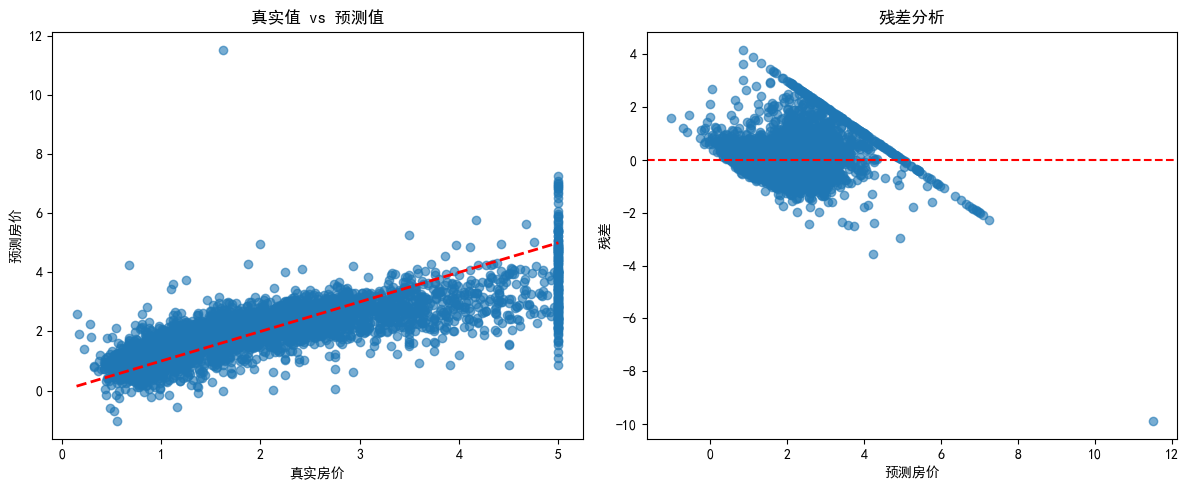

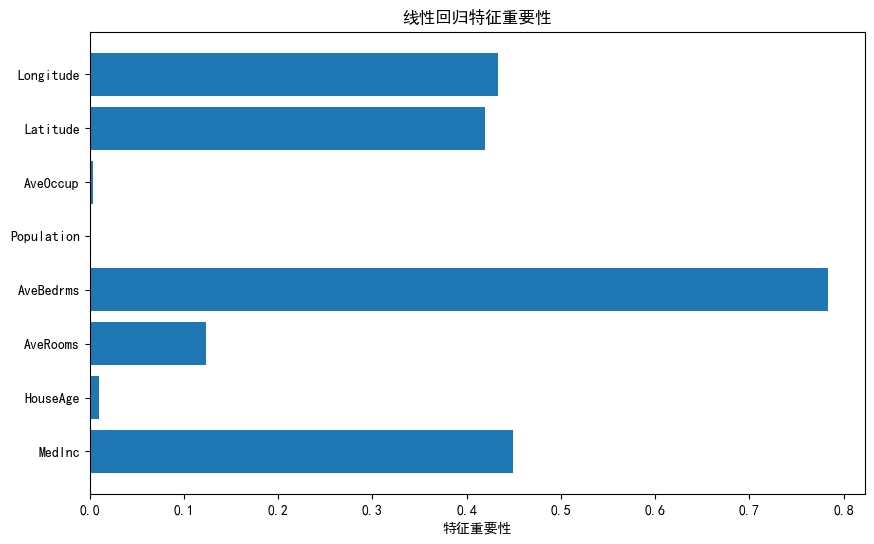

In [8]:
# 加州房价分析
# 使用线性回归模型预测房价
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

#设置显示中文
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题



# 加载加州房价数据集
california = fetch_california_housing()
x_data = california.data
y_data = california.target
print(f"特征形状: {x_data.shape}, 目标形状: {y_data.shape}")
print(f"特征名称: {california.feature_names}")

# 数据分割
X_train, X_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42
)

# 创建并训练线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"均方误差 (MSE): {mse:.2f}")
print(f"决定系数 (R²): {r2:.3f}")

# 可视化预测结果
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('真实房价')
plt.ylabel('预测房价')
plt.title('真实值 vs 预测值')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('预测房价')
plt.ylabel('残差')
plt.title('残差分析')

plt.tight_layout()
plt.show()

# 显示特征重要性
feature_importance = abs(model.coef_)
features = california.feature_names
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel('特征重要性')
plt.title('线性回归特征重要性')
plt.show()